# Pymaceuticals Inc.
---

### Analysis

The boxplot analysis of four treatments shows that Capomulin and Ramicane lead to smaller tumors compared to Infubinol and Ceftamin. A correlation exists between mouse weight and average tumor volume, with larger mice having larger tumors. The distribution of gender among treated mice is nearly equal, with 51% males and 49% females, and gender does not seem to influence tumor volume.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
total_mice = mouse_data_complete["Mouse ID"].unique()
total_of_mice=len(total_mice)
total_of_mice

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID","Timepoint"],keep = False)]
duplicate_mice["Mouse ID"].values


array(['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989',
       'g989', 'g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete.loc[(mouse_data_complete["Mouse ID"] == "g989"),:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Dataframe = Clean_Dataframe.loc[(Clean_Dataframe["Mouse ID"] != "g989"),:]
Clean_Dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice in the clean DataFrame.
count_clean_data= len(Clean_Dataframe)
count_clean_data

1888

In [40]:
# Checking the number of mice in the clean DataFrame.

mice=Clean_Dataframe["Mouse ID"].value_counts()
total_of_mice_clean=len(mice)
total_of_mice_clean
    

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_regimen=Clean_Dataframe.set_index(["Drug Regimen"])
group_Drug_regimen=Drug_regimen.groupby("Drug Regimen")
mean_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].mean()
median_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].median()
var_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].var()
std_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].std()
sem_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].sem()
Drug_regimen_sum_df=pd.DataFrame({"Mean Tumor Vol":mean_Drug_regimen, 
                                 "Mediam Tumor Vol":median_Drug_regimen,
                                  "Var Tumor Vol":var_Drug_regimen,
                                 "STD. Dev Tumor Vol":std_Drug_regimen,
                                 "SEM Tumor Vol":sem_Drug_regimen,})
Drug_regimen_sum_df.sort_values("Drug Regimen")
Drug_regimen_sum_df


,Mean Tumor Vol,Mediam Tumor Vol,Var Tumor Vol,STD. Dev Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_Drug_regimen_sum_df=Drug_regimen.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median",
                                                                                            "var","std","sem"])
agg_Drug_regimen_sum_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

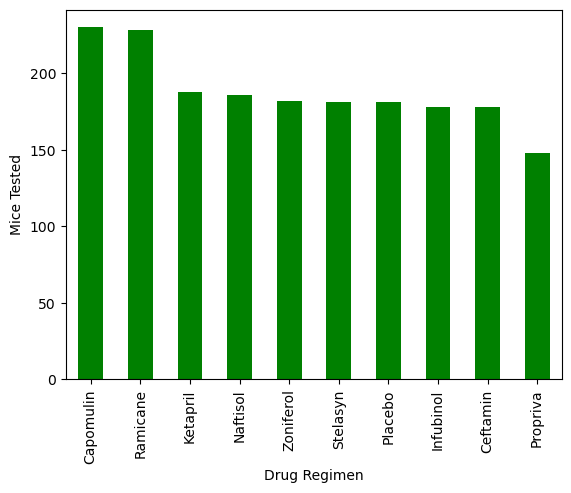

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mice_Tested=Clean_Dataframe[["Drug Regimen", "Timepoint"]]
Mice_per_Drug=Mice_Tested["Drug Regimen"].value_counts()
Mice_per_Drug.plot(kind="bar",color="green",xlabel="Drug Regimen", ylabel="Mice Tested", align="center")
plt.show()


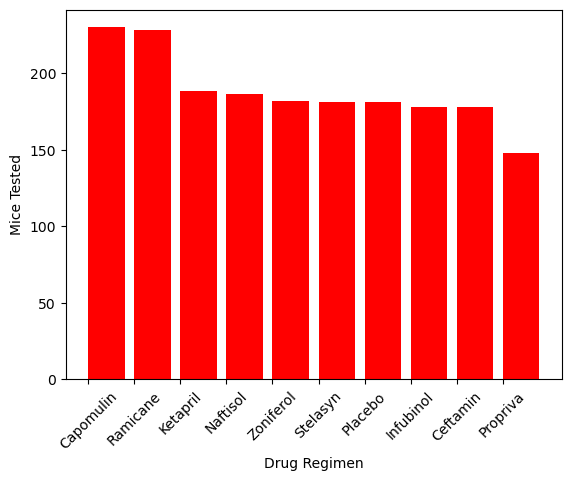

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Regimen=Mice_per_Drug.index.values
Mice_tested=Mice_per_Drug.values
plt.bar(Regimen,Mice_tested, color="red",align="edge")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xticks(rotation=45)
plt.show()



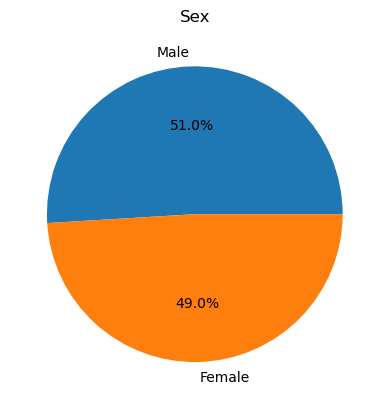

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = Clean_Dataframe['Sex'].value_counts()
pie_plot = data.plot.pie(autopct="%1.1f%%")# ,startangle=90 )
pie_plot.set_ylabel('')
plt.title("Sex")
plt.show()


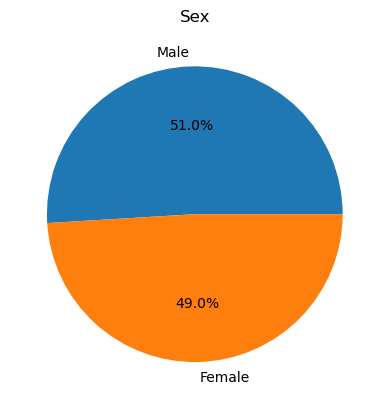

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = Clean_Dataframe['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%")
plt.title('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = mouse_data_complete[mouse_data_complete["Drug Regimen"].isin(drug_list)]
drugs.head()
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1





------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
by_mouse = mouse_data_complete.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

mouse_data_complete = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(mouse_data_complete,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


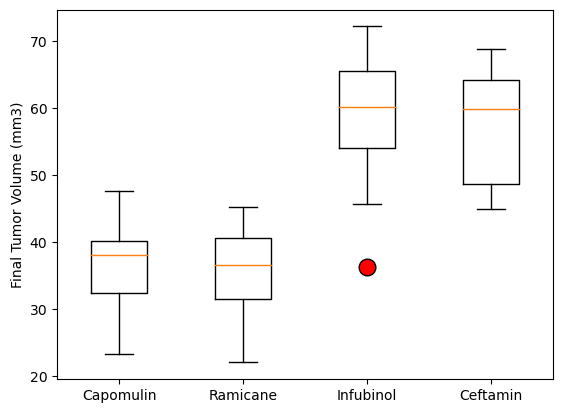

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

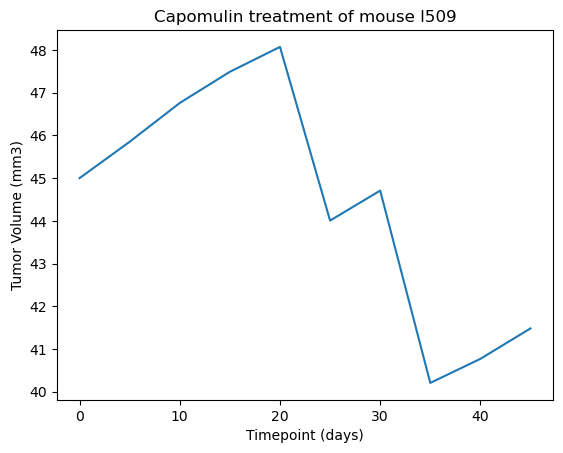

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin=Clean_Dataframe.loc[(Clean_Dataframe["Drug Regimen"]=="Capomulin") & (Clean_Dataframe["Mouse ID"]=="l509")]
l509_capomulin=Capomulin[["Timepoint","Tumor Volume (mm3)"]]
l509_capomulin=l509_capomulin.set_index(["Timepoint"])
Tumor_volume=l509_capomulin.values
Timepoint=l509_capomulin.index.values
plt.plot(Timepoint,Tumor_volume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


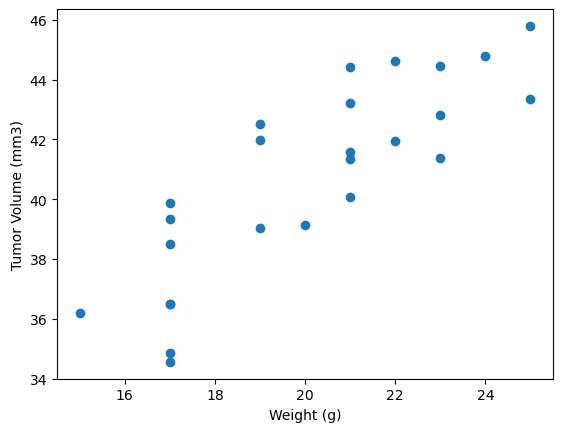

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Mouse_Capomulin=Clean_Dataframe.loc[(Clean_Dataframe["Drug Regimen"]=="Capomulin")]
group_Capomulin=Mouse_Capomulin.groupby("Mouse ID")
avg_tumor_volume=group_Capomulin[("Tumor Volume (mm3)")].mean()
Weight=group_Capomulin[("Weight (g)")].mean()
avg_Capomulin=pd.DataFrame({"Weight (g)":Weight,"Tumor Volume (mm3)":avg_tumor_volume})
plt.scatter(Weight,avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


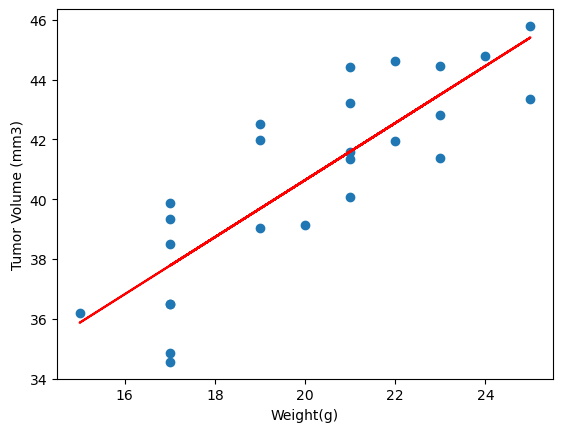

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr (Weight,avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
x_values=avg_Capomulin["Weight (g)"]
y_values=avg_Capomulin["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(Weight,avg_tumor_volume)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


